# Start by importing libraries

In [5]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

# Import data

In [6]:
import csv
import pandas as pd
import numpy as np

filename = "Poe_NotPoe_50words.csv"

# read csv
pdf = pd.read_csv(filename, index_col=None)

# edit dataframe
pdf = pdf.drop([0,1])
pdf.rename(columns={'Unnamed: 0' : 'class'}, inplace=True)
pdf.reset_index(inplace=True, drop=True)

# create array of features
features = pdf.columns
features = features[1:]

# create dataframe of features (X)
X = pdf.to_numpy()
X = X[:,1:]

# create count of unique labels/classes (y)
unique_classes = []
for each in pdf['class']:
    if each not in unique_classes and each != "UNKNOWN":
        unique_classes.append(each)

y = len(unique_classes)

# Model Clusters

Text(0, 0.5, 'as')

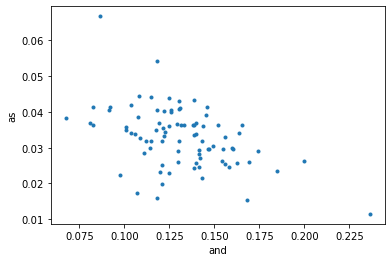

In [7]:
# create random seed
np.random.seed(0)
feature_x = 2
feature_y = 3
plt.scatter(X[:, feature_x], X[:, feature_y], marker='.')
plt.xlabel(features[feature_x])
plt.ylabel(features[feature_y])

# Data Visualization

In [8]:
# locating each variable value in pdf['class'] and assigning it a numerical value
pdf.loc[pdf['class'] == 'NotPoe', 'class'] = 1
pdf.loc[pdf['class'] == 'Poe', 'class'] = 2
# setting unknown to our "guess", so that analysis will give a "right"/"wrong" answer
pdf.loc[pdf['class'] == 'UNKNOWN', 'class'] = 2

# setting the data type of the classes to int
pdf['class'] = pdf['class'].astype('float')

numberOfClusters = 2 # USER SET

k_means = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_


k_means_cluster_centers = k_means.cluster_centers_


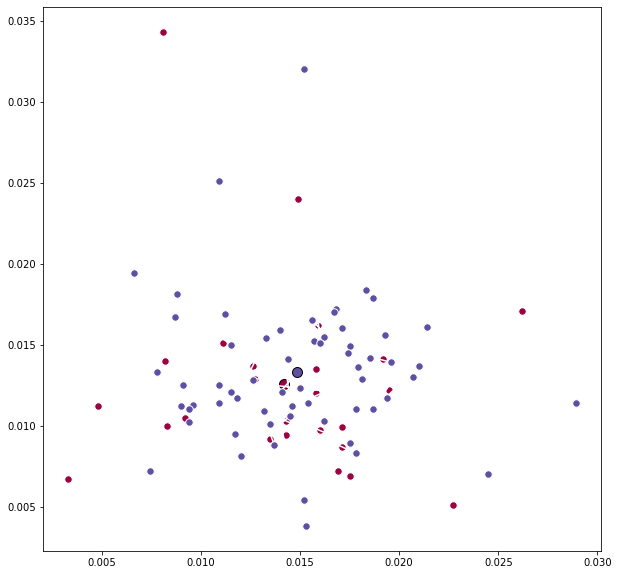

In [9]:
k_means3 = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 40)
k_means3.fit(X)
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
#ax.plot()
plt.show()



# label data points

AttributeError: module 'matplotlib.pyplot' has no attribute 'legend_elements'

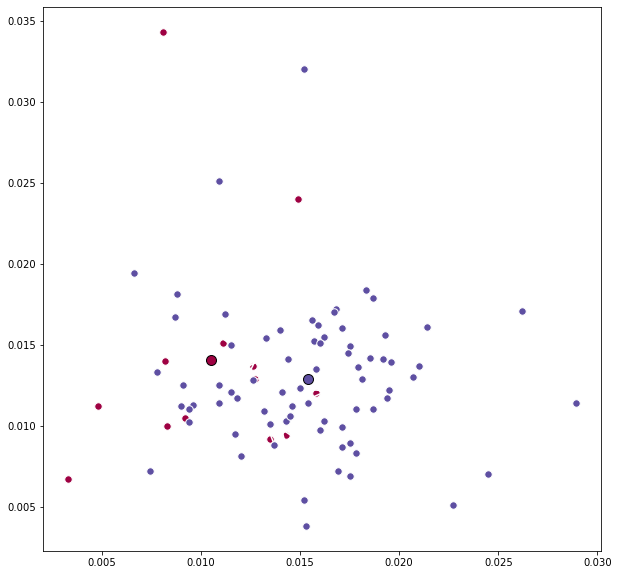

In [99]:

pca = PCA(n_components = 2, svd_solver = 'full').fit(X)
#pca = PCA(n_components = 'mle', svd_solver = 'full').fit(X)
# kmeans = KMeans(init=pca.components_, n_clusters=39, n_init=1)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
#bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)
kmeans_cluster_centers = k_means.cluster_centers_


#k_means4 = KMeans(init = , n_clusters = numberOfClusters, n_init = 40)
kmeans.fit(X)
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
az = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(kmeans.cluster_centers_)), colors):
    my_members = (kmeans.labels_ == k)
    cluster_center = kmeans.cluster_centers_[k]
    az.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    az.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
#     print(X[my_members,1])
    #print(X[my_members])
    
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*plt.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
#ax.plot()
#plt.show()


# label data points

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ValueError: 'c' argument has 86 elements, which is inconsistent with 'x' and 'y' with size 85.

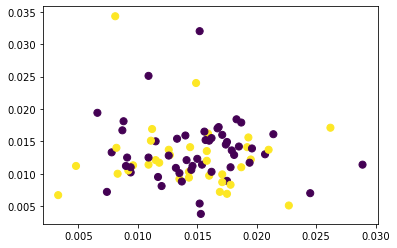

In [96]:
for eachRow in range(len(pdf)):
    plt.scatter(X[eachRow:, 0], X[eachRow:, 1], c=y_kmeans, s=50, cmap='viridis', label=eachRow)

centers = kmeans.cluster_centers_
plt.legend()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
